### **Semana 7: Actividad 1** - Visualización

**Iván Lee Cancino - A01793491**

### **TC4029 - Ciencia y Analítica de Datos**

**Prof. María de la Paz Rico Fernández**

**Prof. Julio César Galindo López**

*01 - Noviembre - 2022*

---


---

In [2]:
#importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

### 1. Descarga los datos y carga el dataset en tu libreta

Este dataset contiene información crediticia de clientes en Taiwan. La información ha sido usada para comparar la exactitud de seis diferentes modelos predictivos. Desde la perspectiva de gestión de riesgo, es mas valioso contar con una estimación de la probabilidad de incumplimiento de los clientes que solo tener una segmentación binaria. 

La variable de salida 'Y' representa la probabilidad real de que el cliente incumpla con el pago crediticio (1=Si, 0=No).

X1: Monto del credito otorgado

X2: Genero(1=masculino, 2=femenino)

X3: Nivel educativo (1=posgrado, 2=universidad, 3=preparatoria, 4=otros)

X4: Estado civil (1=casado 2=soltero 3=otro)

X5: Edad

X6-X11: Historial de status de pago (de Abril a Septiembre 2005)

X12-X17: Monto por pagar (de Abril a Septiembre 2005)

X18-X23: Monto de pago anterior (de Abril a Septiembre 2005)
_ _ _
> Fuente: 

> * Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

In [3]:
#Creamos dataframe del archivo csv
df = pd.read_csv('default_of_credit_card_clients.csv')

### 2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [4]:
# numero de filas y columnas del dataframe
df.shape 

(30000, 25)

In [5]:
# nombres de las columnas
df.columns 

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [6]:
# Visualisamos las primeras 5 filas del dataset
df.head() 

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [7]:
# Revisamos el tipo de dato en cada columna
df.dtypes 

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [8]:
# Con .info obtenemos mas detalles del dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

Observamos que todas las columnas tienen datos nulos, a excepción de las primeras 2: **ID**, **X1**. 

In [9]:
# Confirmamos que existen valores faltantes 
df.isna().values.any()

True

### 3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [10]:
# Creamos una copia del dataframe original para trabajar
df2 = df.copy()

Iniciamos por la variable de salida **Y:** representa la probabilidad real de que el cliente incumpla con el pago crediticio (1=Si, 0=No).  

In [11]:
# verificamos valores únicos en la columna Y
df2['Y'].unique()

array([ 1.,  0., nan])

Optamos por eliminar las filas con valores nulos.

In [12]:
# eliminamos valores nulos de columna Y
df2.dropna(inplace=True, subset=['Y'])

La columna X1 representa el monto del crédito otorgado al cliente, No tiene registros nulos.

**Imputamos con la moda las variables categoricas y con la media las variables numericas.**

Columna **X2:** género (1=masculino, 2=femenino). Verificamos que solo existan estos dos valores posibles e imputamos los faltantes con el valor de la moda.

In [13]:
# verificamos valores únicos en la columna
df2['X2'].unique()

array([ 2.,  1., nan])

In [101]:
# imputamos faltantes con la moda
x2mode = (df2['X2'].mode())
df2['X2'].fillna(x2mode, inplace=True)

Columna **X3:** nivel escolar (1=posgrado, 2=universidad, 3=preparatoria, 4=otros). similar a la columna X2 imputamos el valor de la moda a los faltantes. 

In [15]:
# verificamos valores únicos en la columna
df2['X3'].unique()

array([ 2.,  1.,  3.,  5.,  4.,  6.,  0., nan])

Los valores 0, 5, y 6 no corresponden a una de las categorias posibles, por lo que los convertiremos a *NaN* y posteriormente imputaremos el valor de la moda usando solo valores permitidos (1, 2, 3 o 4).

In [16]:
# convertimos a NaN los valores 
N = len(df2['X3'])
for i in range(N):
    if df2.iloc[i, 3] > 4:
        df2.iloc[i, 3] = np.nan 
    elif df2.iloc[i, 3] == 0:
        df2.iloc[i, 3] = np.nan

df2['X3'].unique()

array([ 2.,  1.,  3., nan,  4.])

In [102]:
# imputamos faltantes con la moda
x3mode = (df2['X3'].mode())
df2['X3'].fillna(x3mode, inplace=True)

Columna **X4:** estado civil (1=casado, 2=soltero, 3=otro). Nuevamente imputamos el valor de la moda a los valores faltantes.

In [18]:
# verificamos valores únicos en la columna
df2['X4'].unique() 

array([ 1.,  2.,  3.,  0., nan])

En este caso, el valor 0 no representa una categoria, por tanto lo que convertimos a nulo, e imputamos con la moda. 

In [19]:
# sustituimos los valores 0 por NaN
for i in range(N):
    if df2.iloc[i, 4] == 0:
        df2.iloc[i, 4] = np.nan 

df2['X4'].unique()

array([ 1.,  2.,  3., nan])

In [103]:
# imputamos faltantes con la moda
x4mode = df2['X4'].mode()
df2['X4'].fillna(x4mode, inplace=True)

Columna **X5:** edad del cliente (años)

In [21]:
# imputamos faltantes con la media
x5mean = df2['X5'].mean().round(0)
df2['X5'].fillna(x5mean, inplace=True)


Columnas **X6 - X11:** record de pago mensual de abril a septiembre (X6:septiembre, X7:agosto,...,X11:abril)

Valores: -1=pago a tiempo; 1=retraso 1 mes; 2=retraso 2 meses;...; 8=retraso 8 meses; 9=retraso 9 o mas meses.

In [90]:
# revisamos columnas X6 a X11
x6_x11 = df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']]
x6_x11

,X6,X7,X8,X9,X10,X11
0,2.0,2.0,-1.0,-1.0,-2.0,-2.0
1,-1.0,2.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.0,0.0,-1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0
29996,-1.0,-1.0,-1.0,-1.0,0.0,0.0
29997,4.0,3.0,2.0,-1.0,0.0,0.0
29998,1.0,-1.0,0.0,0.0,0.0,-1.0


Se observan valores de **-2.0** y **0** que no corresponden a ninguna categoría de estas columnas. Por lo tanto asignamos el valor *NaN* a todos los valores no permitidos. 

In [91]:
# Iteramos fila por fila de la columna X6 a la X11
for j in range(6):
    for i in range(N):
        if df2.iloc[i, 6+j] < -1:
            df2.iloc[i, 6+j] = np.nan 
        elif df2.iloc[i, 6+j] == 0:
            df2.iloc[i, 6+j] = np.nan
        elif df2.iloc[i, 6+j] > 9:
            df2.iloc[i, 6+j] = np.nan 

Imputamos los nulos con el valor de la moda de cada columna.

In [92]:
# calculamos la moda
x6mode = df2['X6'].mode()
x7mode = df2['X7'].mode()
x8mode = df2['X8'].mode()
x9mode = df2['X9'].mode()
x10mode = df2['X10'].mode()
x11mode = df2['X11'].mode()

In [104]:
# imputamos valores
df2['X6'].fillna(x6mode, inplace=True)
df2['X7'].fillna(x7mode, inplace=True)
df2['X8'].fillna(x8mode, inplace=True)
df2['X9'].fillna(x9mode, inplace=True)
df2['X10'].fillna(x10mode, inplace=True)
df2['X11'].fillna(x11mode, inplace=True)

# verificamos
df2[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']].isnull().values.any()

False

Columnas **X12 - X17:** monto por pagar de abril a septiembre (X12:septiembre, X13:agosto,...,X17:abril)

In [26]:
# revisamos estadisticas
amnt= df2[['X12', 'X13', 'X14', 'X15', 'X16', 'X17']]
amnt.describe() 

,X12,X13,X14,X15,X16,X17
count,29988.000000,29988.000000,2.998700e+04,29985.000000,29983.000000,29990.000000
mean,51237.191210,49190.970555,4.702535e+04,43275.652326,40324.493980,38881.135745
std,73646.425254,71184.560296,6.936086e+04,64345.500073,60809.984983,59561.312967
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3564.750000,2985.750000,2.667500e+03,2329.000000,1763.500000,1256.250000
50%,22385.500000,21205.000000,2.008900e+04,19052.000000,18107.000000,17081.000000
75%,67139.750000,64027.250000,6.018200e+04,54560.000000,50213.000000,49208.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Observamos montos negativos, los cuales tendremos que asumir como error de captura y los convertimos a monto positivo.

In [27]:
# usamos metodo abs para regresar solo valores positivos
for m in df2.iloc[:,12:18]:
    df2[m] = df2[m].abs()

Debido a que se observan valores extremos (*outliers*), usamos la mediana para los valores nulos.

In [28]:
# calculamos la mediana
x12med = df2['X12'].median()
x13med = df2['X13'].median()
x14med = df2['X14'].median()
x15med = df2['X15'].median()
x16med = df2['X16'].median()
x17med = df2['X17'].median()

In [105]:
# imputamos valores
df2['X12'].fillna(x12med, inplace=True)
df2['X13'].fillna(x13med, inplace=True)
df2['X14'].fillna(x14med, inplace=True)
df2['X15'].fillna(x15med, inplace=True)
df2['X16'].fillna(x16med, inplace=True)
df2['X17'].fillna(x17med, inplace=True)

# verificamos
df2[['X12', 'X13', 'X14', 'X15', 'X16', 'X17']].isnull().values.any()

False

Columnas **X18 - X23:** monto de pago anterior de abril a septiembre (X18:septiembre, X19:agosto,...,X23:abril)

In [30]:
# revisamos estadisticas
amnt2 = df2[['X18', 'X19', 'X20', 'X21', 'X22', 'X23']]
amnt2.describe() 

,X18,X19,X20,X21,X22,X23
count,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000
mean,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977
std,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000
50%,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


En este caso no hay valores negativos por lo que procedemos a imputar valores nulos con la mediana.

In [31]:
# calculamos la mediana
x18med = df2['X18'].median()
x19med = df2['X19'].median()
x20med = df2['X20'].median()
x21med = df2['X21'].median()
x22med = df2['X22'].median()
x23med = df2['X23'].median()

In [106]:
# imputamos valores
df2['X18'].fillna(x18med, inplace=True)
df2['X19'].fillna(x19med, inplace=True)
df2['X20'].fillna(x20med, inplace=True)
df2['X21'].fillna(x21med, inplace=True)
df2['X22'].fillna(x22med, inplace=True)
df2['X23'].fillna(x23med, inplace=True)

# verificamos
df2[['X18', 'X19', 'X20', 'X21', 'X22', 'X23']].isnull().values.any()

False

Finalmente verificamos nuevamente que no existan columnas con valores nulos en el data frame:

In [107]:
df2.isnull().any()

ID     False
X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

### 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [34]:
df2.describe().round(4)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29997.0000,29997.0000,29997.0000,29997.0000,29941.0000,29997.0000,29997.0000,29997.0000,29997.0000,29997.0000,...,29997.0000,29997.0000,29997.0000,29997.0000,2.999700e+04,29997.0000,29997.0000,29997.0000,29997.0000,29997.0000
mean,14999.8038,167496.0723,1.6038,1.8192,1.5547,35.4838,-0.4161,-0.5322,-0.5560,-0.6245,...,43339.3816,40385.5240,39017.0920,5662.3520,5.921706e+03,5225.0524,4826.3652,4799.4170,5216.0122,0.2212
std,8659.8374,129748.8039,0.4891,0.7074,0.5183,9.2173,1.1425,1.1463,1.1251,1.0673,...,64285.0151,60750.2834,59462.9865,16562.8484,2.304194e+04,17607.0105,15666.7566,15278.8993,17778.2815,0.4151
min,1.0000,10000.0000,1.0000,1.0000,1.0000,21.0000,-1.0000,-1.0000,-1.0000,-1.0000,...,0.0000,0.0000,0.0000,0.0000,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000
25%,7501.0000,50000.0000,1.0000,1.0000,1.0000,28.0000,-1.0000,-1.0000,-1.0000,-1.0000,...,2400.0000,1868.0000,1361.0000,1000.0000,8.360000e+02,390.0000,298.0000,254.0000,118.0000,0.0000
50%,15000.0000,140000.0000,2.0000,2.0000,2.0000,34.0000,-1.0000,-1.0000,-1.0000,-1.0000,...,19068.0000,18128.0000,17135.0000,2100.0000,2.009000e+03,1800.0000,1500.0000,1500.0000,1500.0000,0.0000
75%,22499.0000,240000.0000,2.0000,2.0000,2.0000,41.0000,-1.0000,-1.0000,-1.0000,-1.0000,...,54560.0000,50209.0000,49252.0000,5006.0000,5.000000e+03,4505.0000,4013.0000,4031.0000,4000.0000,0.0000
max,30000.0000,1000000.0000,2.0000,4.0000,3.0000,79.0000,8.0000,8.0000,8.0000,8.0000,...,891586.0000,927171.0000,961664.0000,873552.0000,1.684259e+06,896040.0000,621000.0000,426529.0000,528666.0000,1.0000


En las variables numericas (X12 a X23) podemos ver una gran dispersión de los datos, con una desviación estandar muy grande. De esta tabla no es posible observar los valores atípicos pero podemos deducir que existen, ya que del tercer cuartil al valor máximo observamos grandes diferencias. Se observa también que la media esta muy por arriba de la mediana, y como sabemos la media es suceptible a valores atípicos.

### 5. Realiza el conteo de las variables categóricas

De acuerdo a la documentación de la base de datos, las variables categóricas son las siguientes: **'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y'**

In [94]:
# Creamos un dataframe solo con las variables categoricas
df_cat = df2[['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y']] 
df_cat 

,X2,X3,X4,X6,X7,X8,X9,X10,X11,Y
0,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,1.0
1,2.0,2.0,2.0,-1.0,2.0,-1.0,-1.0,-1.0,2.0,1.0
2,2.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
3,2.0,2.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
4,1.0,2.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
29995,1.0,3.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
29996,1.0,3.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
29997,1.0,2.0,2.0,4.0,3.0,2.0,-1.0,-1.0,-1.0,1.0
29998,1.0,3.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [115]:
df_cat.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29997 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X2      29997 non-null  float64
 1   X3      29997 non-null  float64
 2   X4      29997 non-null  float64
 3   X6      29997 non-null  float64
 4   X7      29997 non-null  float64
 5   X8      29997 non-null  float64
 6   X9      29997 non-null  float64
 7   X10     29997 non-null  float64
 8   X11     29997 non-null  float64
 9   Y       29997 non-null  float64
dtypes: float64(10)
memory usage: 2.5 MB


Imprimimos el conteo de las variables categóricas:

In [113]:
print('X2:')
print(df2['X2'].value_counts())

X2:
2.0    18112
1.0    11885
Name: X2, dtype: int64


In [114]:
print('X3')
print(df2['X3'].value_counts())

X3
2.0    14375
1.0    10584
3.0     4915
4.0      123
Name: X3, dtype: int64


In [116]:
print('X4')
print(df2['X4'].value_counts())

X4
2.0    16019
1.0    13655
3.0      323
Name: X4, dtype: int64


In [117]:
print('X6')
print(df2['X6'].value_counts())

X6
-1.0    23181
 1.0     3688
 2.0     2665
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: X6, dtype: int64


In [118]:
print('X7')
print(df2['X7'].value_counts())

X7
-1.0    25561
 2.0     3925
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: X7, dtype: int64


In [119]:
print('X8:')
print(df2['X8'].value_counts())

X8:
-1.0    25787
 2.0     3817
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
Name: X8, dtype: int64


In [120]:
print('X9:')
print(df2['X9'].value_counts())

X9:
-1.0    26490
 2.0     3156
 3.0      180
 4.0       69
 7.0       58
 5.0       35
 6.0        5
 1.0        2
 8.0        2
Name: X9, dtype: int64


In [121]:
print('X10:')
print(df2['X10'].value_counts())

X10:
-1.0    27032
 2.0     2623
 3.0      178
 4.0       84
 7.0       58
 5.0       17
 6.0        4
 8.0        1
Name: X10, dtype: int64


In [122]:
print('X11:')
print(df2['X11'].value_counts())

X11:
-1.0    26920
 2.0     2764
 3.0      184
 4.0       49
 7.0       46
 6.0       19
 5.0       13
 8.0        2
Name: X11, dtype: int64


In [123]:
print('Y:')
print(df2['Y'].value_counts())

Y:
0.0    23362
1.0     6635
Name: Y, dtype: int64


### 6. Escala los datos, si consideras necesario

Para realizar un PCA es necesario que los datos de cada variable esten en una escala similar para evitar que se le atribuya mayor importancia a las variables cuya escala de medición sea mayor. 

In [37]:
# importamos modulos de scikit-learn
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

In [38]:
# Creamos un dataframe solo con variables numericas 
df_num = df2.copy() 
df_num.drop(['ID', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y'],
            axis=1, inplace=True)

Usamos *StandardScaler* de Scikit-learn para estandarizar los datos. StandardScaler hace una **Normalización de puntuación Z** 

In [39]:
# Usamos StandardScaler para estandarizar los datos
scaler = StandardScaler()
ndf_scaled = pd.DataFrame(scaler.fit_transform(df_num),
                          columns = df_num.columns)

In [40]:
# Verificamos resultado de la estandarización
ndf_scaled.describe().round(2) 

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,29997.00,29997.00,29997.00,29997.00,29997.00,29997.00,29997.00,29997.00,29997.00,29997.00,29997.00,29997.00,29997.00,29997.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.21,-1.57,-0.70,-0.69,-0.68,-0.67,-0.66,-0.66,-0.34,-0.26,-0.30,-0.31,-0.31,-0.29
25%,-0.91,-0.81,-0.65,-0.65,-0.64,-0.64,-0.63,-0.63,-0.28,-0.22,-0.27,-0.29,-0.30,-0.29
50%,-0.21,-0.16,-0.39,-0.39,-0.39,-0.38,-0.37,-0.37,-0.22,-0.17,-0.19,-0.21,-0.22,-0.21
75%,0.56,0.60,0.22,0.21,0.19,0.17,0.16,0.17,-0.04,-0.04,-0.04,-0.05,-0.05,-0.07
max,6.42,4.72,12.41,13.14,23.33,13.20,14.60,15.52,52.40,72.84,50.60,39.33,27.60,29.44


### 7. Reduce las dimensiones con PCA, si consideras necesario.

* 1. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

* 2. Indica la importancia de las variables en cada componente

In [41]:
# Realizamos PCA
pcs = PCA()
p_comp = pcs.fit_transform(ndf_scaled)

In [42]:
# Creamos una tabla con los datos de la varianza 
pcsSummary_df = pd.DataFrame({
                              'Proporcion de varianza': pcs.explained_variance_ratio_,
                              'Proporcion acumulada': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()

# Cambiamos el nombre de las columnas
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Proporcion de varianza,0.4235,0.1223,0.0746,0.0661,0.0629,0.0622,0.0556,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Proporcion acumulada,0.4235,0.5458,0.6204,0.6865,0.7494,0.8116,0.8672,0.9190,0.9696,0.9884,0.9936,0.9965,0.9983,1.0000


De acuerdo a la tabla, observamos que los primeros **5 PCs** explican el **74.94%** de la variaza total.

In [43]:
# Obtenemos los coeficientes o pesos de cada PC
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                 columns = pcsSummary_df.columns,
                                 index = df_num.columns)
                                 
# Imprimimos los primeros 5 PC                                
pcsComponents_df.iloc[:,:5] 

,PC1,PC2,PC3,PC4,PC5
X1,0.165529,0.300661,-0.378415,-0.199345,-0.024800
X5,0.032734,0.071987,-0.870440,0.335521,0.028277
X12,0.372373,-0.191242,-0.032498,-0.058676,-0.035700
X13,0.382983,-0.175872,-0.001271,0.010324,-0.078062
X14,0.388063,-0.127835,0.034720,0.063193,-0.124188
X15,0.391464,-0.120511,0.033677,0.074012,-0.022010
X16,0.388207,-0.107126,0.033011,0.036893,0.120896
X17,0.380657,-0.092993,0.016897,-0.077381,0.143620
X18,0.135578,0.382611,0.172536,0.362357,-0.233257
X19,0.117018,0.408542,0.199775,0.347381,-0.204056


La importancia de las variables en cada componente se determina por su valor absoluto. Entre mayor sea el valor, mas importancia tendrá para el PC correspondiente.   

In [44]:
# seleccionamos los 5 coeficientes mas importantes del PC 
pd.DataFrame(pcsComponents_df.PC1.abs().nlargest(5)).transpose()

,X15,X16,X14,X13,X17
PC1,0.391464,0.388207,0.388063,0.382983,0.380657


In [45]:
pd.DataFrame(pcsComponents_df.PC2.abs().nlargest(5)).transpose()

,X19,X20,X18,X21,X23
PC2,0.408542,0.392587,0.382611,0.349137,0.322444


In [46]:
pd.DataFrame(pcsComponents_df.PC3.abs().nlargest(5)).transpose()

,X5,X1,X19,X18,X20
PC3,0.87044,0.378415,0.199775,0.172536,0.121715


In [47]:
pd.DataFrame(pcsComponents_df.PC4.abs().nlargest(5)).transpose()

,X22,X23,X18,X19,X5
PC4,0.610281,0.366869,0.362357,0.347381,0.335521


In [48]:
pd.DataFrame(pcsComponents_df.PC5.abs().nlargest(5)).transpose()

,X21,X23,X20,X18,X19
PC5,0.642869,0.595168,0.255059,0.233257,0.204056


### 8. Elabora los histogramas de los atributos para visualizar su distribución

Con el histograma de la variable **X1** visualizamos la distribución del monto de créditos otorgados.

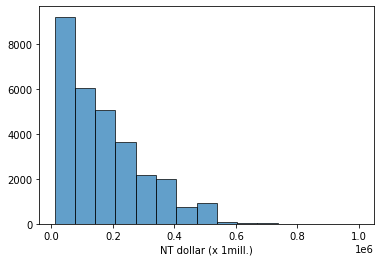

In [49]:
plt.hist(df2['X1'], bins=15, alpha=0.7, edgecolor='black')
plt.xlabel('NT dollar (x 1mill.)')
plt.show()

Con la variable **X5** visualizamos la distribución de la edad de los clientes.

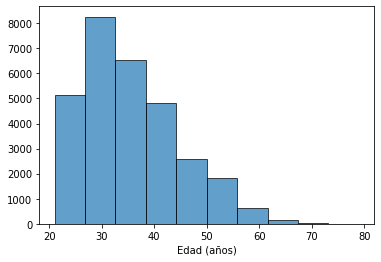

In [50]:
plt.hist(df2['X5'], bins=10, alpha=0.7, edgecolor='black')
plt.xlabel('Edad (años)')
plt.show()

Las variables **X12** a la **X17** representan el estado de cuenta del mes de septiemre a abril respectivamente. Graficamos los histogramas agrupados para visualizar la distribución de los 6 meses.

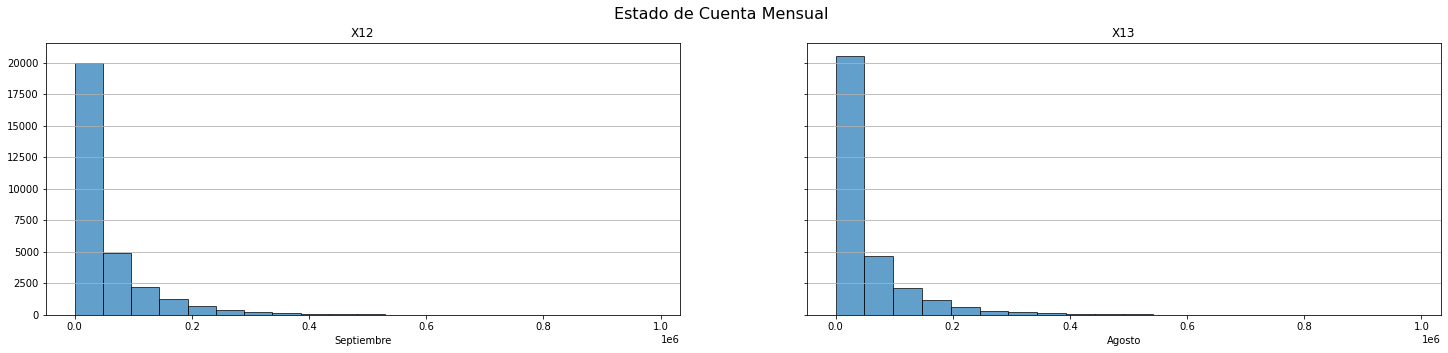

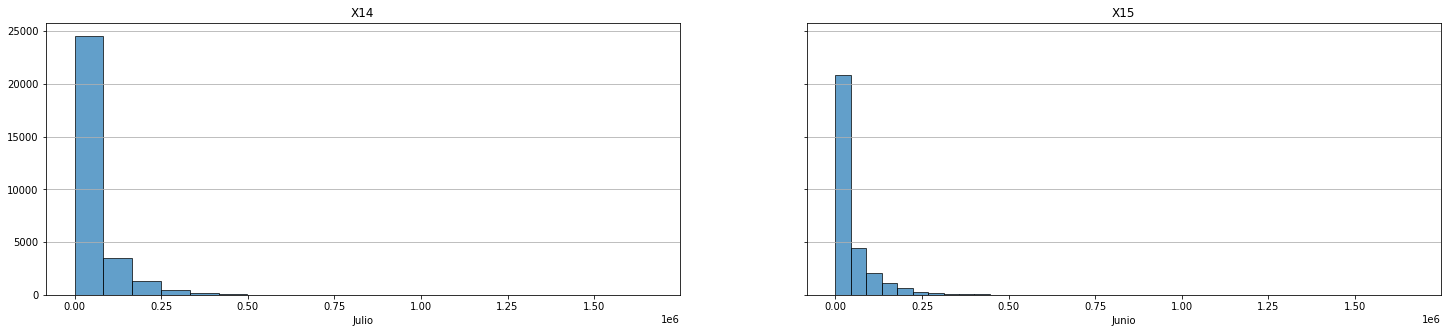

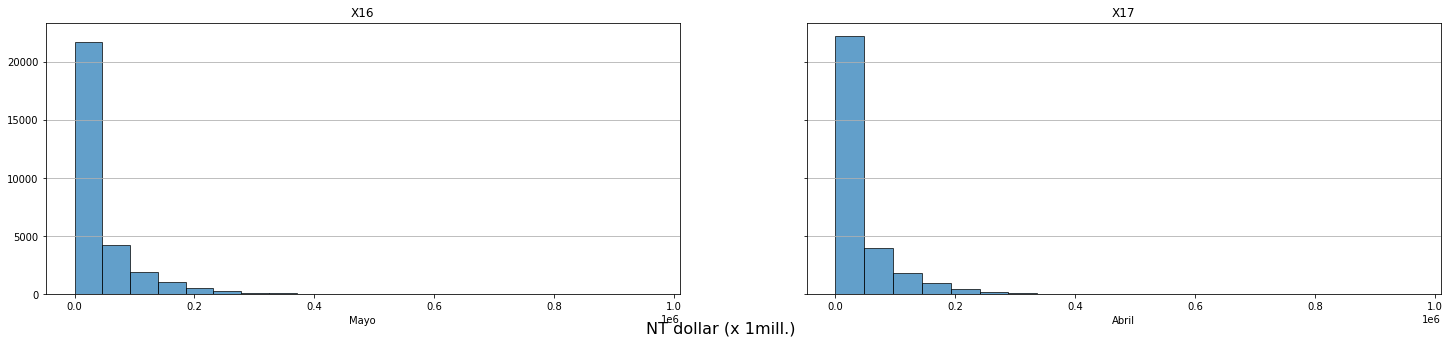

In [51]:
# Primer fila variables X12 y X13
# ajustamos la misma escala en ejes X, Y con parametros 'sharex' y 'sharey'
fig1, axs1 = plt.subplots(nrows=1, ncols=2, figsize=(25, 5), sharex=True, sharey=True)
axs1[0].hist(df2['X12'], bins=20, alpha=0.7, edgecolor='black')
axs1[0].set_title('X12')
axs1[0].set_xlabel('Septiembre')
axs1[0].grid(visible=True, axis='y')
axs1[1].hist(df2['X13'], bins=20, alpha=0.7, edgecolor='black')
axs1[1].set_title('X13')
axs1[1].set_xlabel('Agosto')
axs1[1].grid(visible=True, axis='y')

# Segunda fila variables X14 y X15
fig2, axs2 = plt.subplots(nrows=1, ncols=2, figsize=(25, 5), sharex=True, sharey=True)
axs2[0].hist(df2['X14'], bins=20, alpha=0.7, edgecolor='black')
axs2[0].set_title('X14')
axs2[0].set_xlabel('Julio')
axs2[0].grid(visible=True, axis='y')
axs2[1].hist(df2['X15'], bins=20, alpha=0.7, edgecolor='black')
axs2[1].set_title('X15')
axs2[1].set_xlabel('Junio')
axs2[1].grid(visible=True, axis='y')

# Tercera fila variables X16 y X17
fig3, axs3 = plt.subplots(nrows=1, ncols=2, figsize=(25, 5), sharex=True, sharey=True)
axs3[0].hist(df2['X16'], bins=20, alpha=0.7, edgecolor='black')
axs3[0].set_title('X16')
axs3[0].set_xlabel('Mayo')
axs3[0].grid(visible=True, axis='y')
axs3[1].hist(df2['X17'], bins=20, alpha=0.7, edgecolor='black')
axs3[1].set_title('X17')
axs3[1].set_xlabel('Abril')
axs3[1].grid(visible=True, axis='y')

fig1.suptitle('Estado de Cuenta Mensual', fontsize=16)
fig3.supxlabel('NT dollar (x 1mill.)', fontsize=16)
plt.show()

Las variables **X18** a la **X23** representan el monto mensual de pago anterior de septiemre a abril respectivamente. De igual manera, graficamos los histogramas agrupados para visualizar la distribución de los 6 meses.

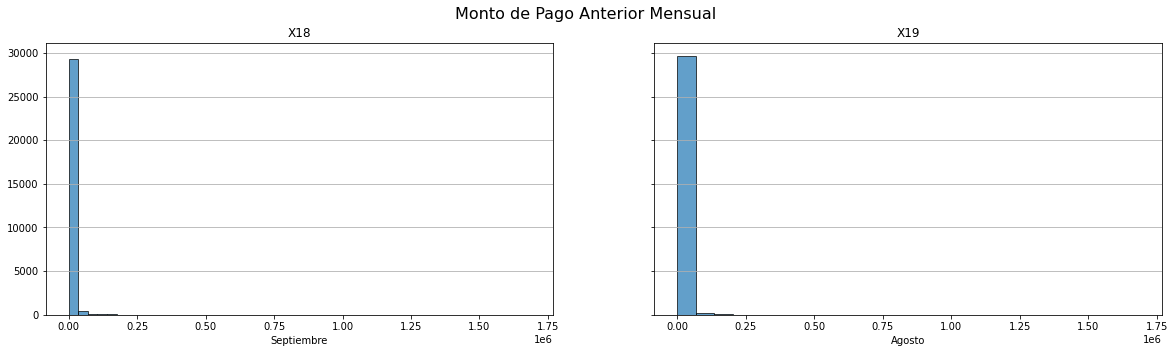

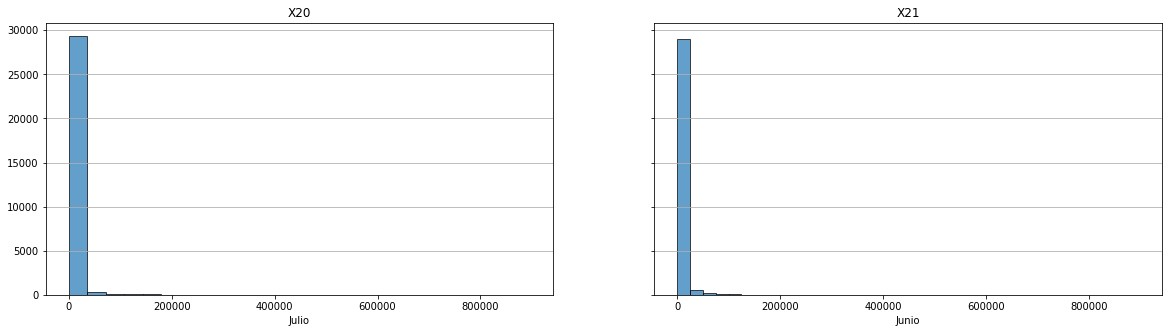

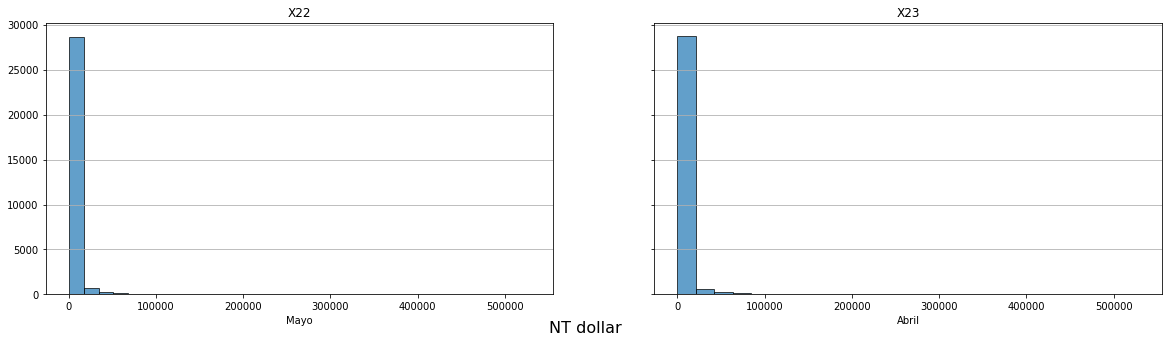

In [52]:
# Primer fila variables X18 y X19
# ajustamos la misma escala en ejes X, Y con parametros 'sharex' y 'sharey'
fig1, axs1 = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), sharex=True, sharey=True,)
axs1[0].hist(df2['X18'], bins=25, alpha=0.7, edgecolor='black')
axs1[0].set_title('X18')
axs1[0].set_xlabel('Septiembre')
axs1[0].grid(visible=True, axis='y')
axs1[1].hist(df2['X19'], bins=25, alpha=0.7, edgecolor='black')
axs1[1].set_title('X19')
axs1[1].set_xlabel('Agosto')
axs1[1].grid(visible=True, axis='y')

# Segunda fila variables X20 y X21
fig2, axs2 = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), sharex=True, sharey=True)
axs2[0].hist(df2['X20'], bins=25, alpha=0.7, edgecolor='black')
axs2[0].set_title('X20')
axs2[0].set_xlabel('Julio')
axs2[0].grid(visible=True, axis='y')
axs2[1].hist(df2['X21'], bins=25, alpha=0.7, edgecolor='black')
axs2[1].set_title('X21')
axs2[1].set_xlabel('Junio')
axs2[1].grid(visible=True, axis='y')

# Tercera fila variables X22 y X23
fig3, axs3 = plt.subplots(nrows=1, ncols=2, figsize=(20,5), sharex=True, sharey=True)
axs3[0].hist(df2['X22'], bins=25, alpha=0.7, edgecolor='black')
axs3[0].set_title('X22')
axs3[0].set_xlabel('Mayo')
axs3[0].grid(visible=True, axis='y')
axs3[1].hist(df2['X23'], bins=25, alpha=0.7, edgecolor='black')
axs3[1].set_title('X23')
axs3[1].set_xlabel('Abril')
axs3[1].grid(visible=True, axis='y')

fig1.suptitle('Monto de Pago Anterior Mensual', fontsize=16)
fig3.supxlabel('NT dollar', fontsize=16)

plt.show()

### 9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

**1. Box-and-whisker plot**

De los histogramas anteriores podemos tener una mejor visualizacion sobre la distribución de los datos con un diagrama de caja y bigotes

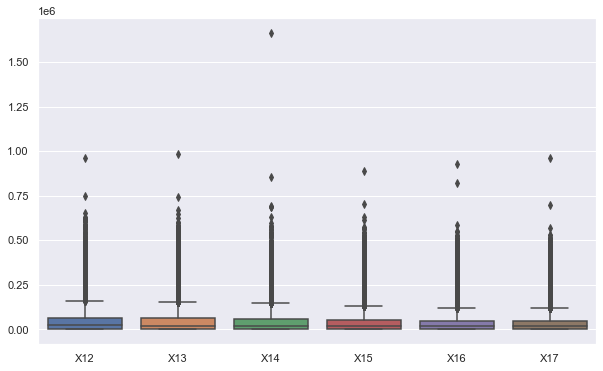

In [53]:
datos1 = df2[['X12', 'X13', 'X14', 'X15', 'X16', 'X17']]

sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(data=datos1)

plt.show()

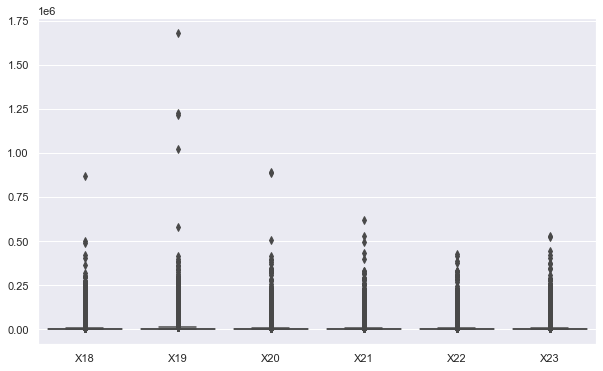

In [54]:
datos2 = df2[['X18', 'X19', 'X20', 'X21', 'X22', 'X23']]

sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(data=datos2)

plt.show()

**2. Strip plot**

La gráfica **Strip-plot** nos da una imagenn un poco mas clara de los datos. Como vemos, la gran cantidad de valores atípicos hacen que con la gráfica de caja y bigotes sea prácticamente imposible de visualizar los datos de la tendencia central.

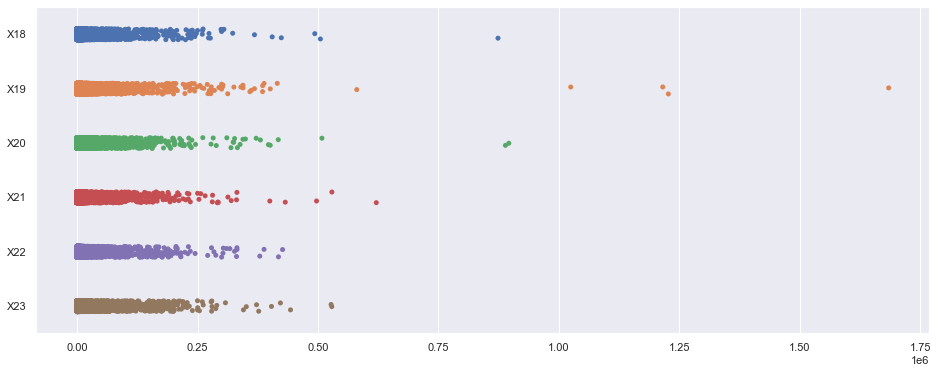

In [87]:
sns.set(rc={'figure.figsize':(16,6)})
sns.stripplot(data=datos2, orient='h')

plt.show()

**3. Joint plot**

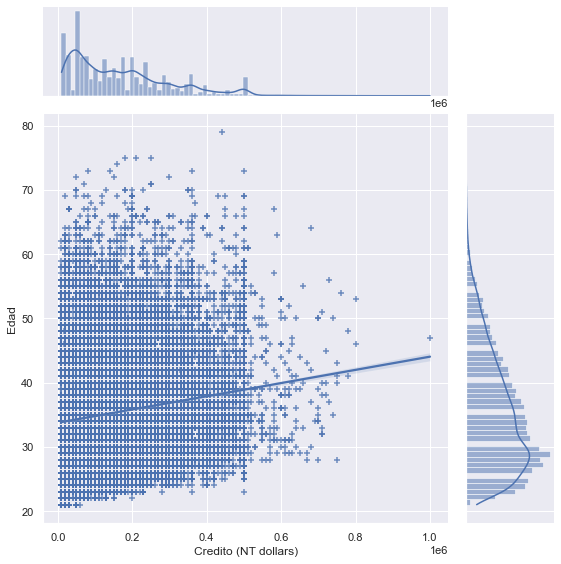

In [100]:
datos3 = df2[['X5', 'X1']]

sns.set(rc={'figure.figsize':(20,20)})
sns.jointplot(datos3, x="X1", y="X5", kind="reg",
              marker="+", height=8, ratio=4
              )

plt.xlabel('Credito (NT dollars)')
plt.ylabel('Edad')             
plt.show()

### 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

**1. Box-and-whisker plot**

La gráfica de caja y bigotes es bastante útil para identificar la disperción de los datos, y para identificar rápidamente valores atípicos. 
Nos indica la distribución del primer cuatil (25%), la media (50%), y el tercer cuartil (75%) asi como los puntos fuera de los "bigotes" que representan valores atípicos. De esta gráfica podemos ver la gran cantidad de outliers que tenemos en nuestro dataset.

**2. Strip plot**

Esta gráfica la usamos para complementar y visualizar mejor los datos de la gráfica de caja y bigotes. Nos da una buena intuición de la distribución y disperción de los datos. Tambien puede ser utilizada como complemento de una gráfica de violín. Aquí observamos mejor cómo gran cantidad de los datos están agrupados por debajo de 200,000 aproximadamente. 



**3. Joint plot**

Este tipo de gráfica nos muestra la correlación de dos variables, incluyendo una linea de regresión. En los márgenes de cada eje nos muestra además la distribución de cada variable por medio de un histograma.
En nuestro caso mostramos la correlación entre la edad del cliente (X5) y el monto de crédito otorgado (X1). Como se puede observar, existe muy poca correlación entre estas dos variables.

En general estos gráficos nos ayudan a entender mejor nuestro set de datos en la fase de exploración. Esta información a su vez nos servirá para decidir si podemos continuar con el proceso de modelado, si es necesario realizar mayor limpieza o incluso obtener mas datos. 

_ _ _
_ _ _